# 词袋模型

In [3]:
import pandas as pd

# 导入数据
file_path = '/Users/huaaa/Desktop/text_analysis_weibo_sample.xlsx'
text_ana = pd.read_excel(file_path)
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana.head()  # 显示前几行，确认数据加载成功

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东


In [5]:
#分析语料
text_ana['标题/微博内容']

0       国债：地产行业重磅利好提振风险偏好，期债低开低走     国债期货全线收跌，10年期主力...
1                                         #喜迎二十大 忠诚保平安#
2     注意！事关明日教资考试！福建省教育考试院发布补充公告  福建省2022年下半年全国中小学教师...
3                        近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...
4                                                樊振东牛逼！
                            ...                        
95                                            老公好漂亮[舔屏]
96    恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...
97    接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...
98       目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...
99                            你们家的小编真的很用心,关注不后悔[话筒][话筒]
Name: 标题/微博内容, Length: 100, dtype: object

# Jieba分词

In [8]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [12]:
import jieba

def word_segmentation(text):
    words=jieba.lcut(text)
    return ' '.join(words)##可以用空格，连成一段话，观察
    
text_ana['标题/微博内容']=text_ana['标题/微博内容'].apply(word_segmentation)
text_ana['标题/微博内容']

0         国债 ： 地产 行业 重磅 利好 提振 风险 偏好 ， 期债 低开 低 走     ...
1                                   # 喜迎 二十大   忠诚 保平安 #
2     注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告     福建省...
3                                           近日 ， “ 千...
4                                             樊振东 牛 逼 ！
                            ...                        
95                                      老公 好 漂亮 [ 舔 屏 ]
96    恭喜 @ 张小娜 呀 娜   1 名 用户 获得 【 小飞 T 】 。 C 官方 唯一 抽奖...
97    接不动 了 ， 居民 部门 负债率 提升 空间 太 有限 了 。 现在 动辄 几万 一 平米...
98          目前 电子 烟 政策 已 从 制定 阶段 逐渐 走向 实施 阶段 ， 而 主要 ...
99            你们 家 的 小编 真的 很 用心 , 关注 不 后悔 [ 话筒 ] [ 话筒 ]
Name: 标题/微博内容, Length: 100, dtype: object

# 构建词袋模型

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana['标题/微博内容'])

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out()[:100])

词袋特征矩阵的形状: (100, 5815)
特征词列表: ['00' '000713' '000998' '002041' '002385' '01' '02' '03' '04' '05' '06'
 '061' '07' '08' '081' '0824' '09' '10' '100' '1000' '10080' '101' '10180'
 '102' '1025' '10274' '10355' '104' '10410' '10455' '105' '10510' '10685'
 '107' '108' '1080' '10cm' '10g' '11' '110' '1100' '11089' '112' '115'
 '116' '11724' '1189' '119' '11998' '12' '120' '1200' '12000' '12010'
 '1210' '122' '12245' '12750' '1280' '13' '130' '13050' '130eflops' '1310'
 '131700' '133' '13300' '13500' '136' '1360' '13686' '13817426131' '1383'
 '1399' '14' '1400' '1420' '145' '1477' '14815' '15' '150' '1500' '15050'
 '15125' '152' '15200' '15305' '15390' '15400' '15459' '155' '156' '15780'
 '1597' '15cm' '16' '16200' '1628' '163']


In [24]:
len(vectorizer.get_feature_names_out())

5815

In [26]:
X

<100x5815 sparse matrix of type '<class 'numpy.int64'>'
	with 9688 stored elements in Compressed Sparse Row format>

In [28]:
list(X.toarray())

[array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 2]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [32]:
# 获取特征词列表
feature_words = vectorizer.get_feature_names_out()
# 获取词频矩阵（转换为数组）
word_counts = X.toarray().sum(axis=0)  # 计算所有样本中每个词的总词频
# 组合成 (词, 词频) 的字典
word_freq = dict(zip(feature_words, word_counts))

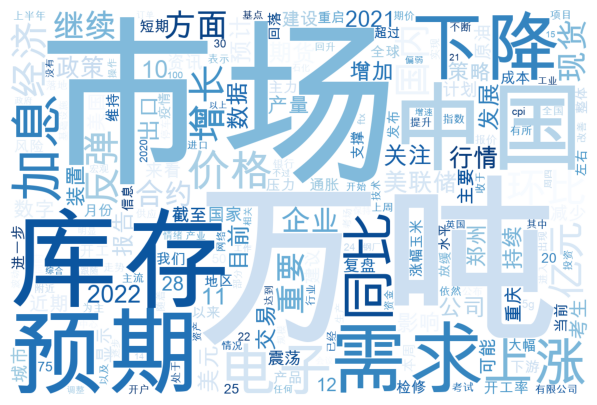

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, height=800
    , max_words=200
    # , max_font_size=100
    , colormap='Blues'
    , background_color='white'
    , font_path= "/Library/Fonts/Arial Unicode.ttf" 
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()